# EarthCODE - CDSE integration with Open Science Catalogue

This notebook showcases how products, workflows, and experiments from the EarthCODE Open Science Catalogue can be utilized within the CDSE openEO federation. Throughout this notebook, we will demonstrate how to access various EarthCODE concepts through openEO.
 
It is important to note that we are utilizing general openEO features. This means that, although this notebook highlights the CDSE openEO federation, these features can be applied to any openEO backend.
 
In this example, we are using a [testing dataset](https://github.com/ESA-EarthCODE/open-science-catalog-metadata-testing/pull/221/files#diff-f4090ea88f66b4d796938c25a4b96106fd2befd2916667c967abd8110690e87), as not all features are fully implemented yet. Currently, the following is still outstanding:
 
  * Long-term storage of the products. For this, the project aims to utilize the ESA PRR.

In [ ]:
import rasterio
import matplotlib.pyplot as plt


def visualise_tif(path: str):
    with rasterio.open(path) as src:
        data = src.read(1)  # Read the first band
        plt.figure(figsize=(10, 10))
        plt.imshow(data, cmap='viridis')
        plt.colorbar()
        plt.show()

## Setup connection with openEO
The first step, before creating any processing workflow in openEO, is to authenticate with an available openEO backend. In this example, we will use the CDSE openEO federation, which provides seamless access to both datasets and processing resources across multiple federated openEO backends.

Currently, the federation includes access to the CDSE and Terrascope backends, enabling users to leverage diverse EO datasets and scalable cloud-based processing resources.

In [1]:
import openeo

In [2]:
connection = openeo.connect(url="openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


## Accessing a Product from the EarthCODE Open Science Catalogue

 In this section, we will demonstrate how to use the openEO tools to reuse a product from the EarthCODE Open Science Catalogue. For this example, we will assume that the Open Science Catalogue is still utilizing the temporary URLs provided by openEO in the [Product](https://github.com/ESA-EarthCODE/open-science-catalog-metadata-testing/blob/c4a1e08684b4b7297d887d35305cc95624c54f77/products/cdse_federation_-_evi_timeseries_experiment_-_example_-_belgium/collection.json) record. Once the integration with the ESA PRR is complete, these can be replaced with the STAC item uploaded to the ESA PRR.
 
  In this example, we are utilizing openEO's [`load_stac`](https://dataspace.copernicus.eu/news/2024-6-3-openeo-introduces-loadstac) feature. This feature allows users to load external data into a datacube. While this datacube can be further processed, we will simply download the result in this notebook to demonstrate that it is functioning as expected.

In [32]:
stac_url = "https://openeo.dataspace.copernicus.eu/openeo/1.1/jobs/j-2504291046594680b7f022a7667eefee/results/NjM5MTg1MWYtOTA0Mi00MTA4LThiMmEtM2RkMmU4YTlkZDBi/a11b5b3d8e2564a44895de05797bb3d9?expires=1746532884"

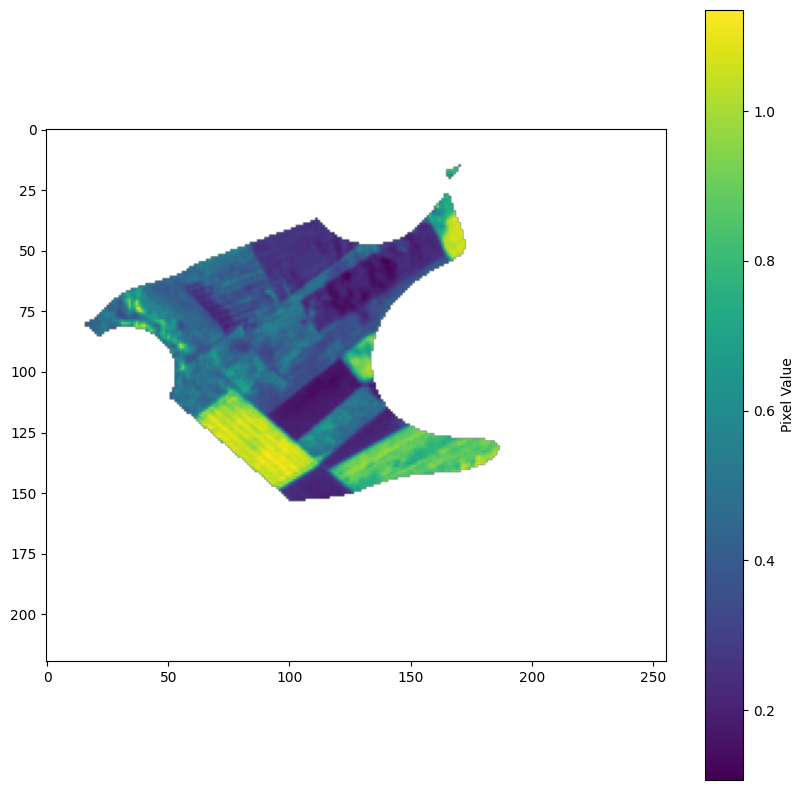

In [33]:


path = "product.tiff"
product = connection.load_stac(stac_url)
product.download(path)

visualise_tif(path)

## Accessing a Workflow

In this example, we will use the OSC to search for a specific workflow. Based on the [Workflow](https://github.com/ESA-EarthCODE/open-science-catalog-metadata-testing/blob/c4a1e08684b4b7297d887d35305cc95624c54f77/workflows/cdse_federation_-_evi_timeseries_experiment_-_example_-_belgium/record.json) record available in the OSC testing environment, we can extract the necessary information to execute the workflow in openEO. This record includes an openEO Process Definition that represents the workflow that was executed.

The workflow can also be accessed directly in the [openEO Web Editor](https://openeo.dataspace.copernicus.eu/?server=https://openeo.dataspace.copernicus.eu/openeo&namespaces=https://openeo.dataspace.copernicus.eu/openeo/1.1/processes/u:6391851f-9042-4108-8b2a-3dd2e8a9dd0b/evi_timeseries&wizard=UDP&wizard~process=evi_timeseries@https://openeo.dataspace.copernicus.eu/openeo/1.1/processes/u:6391851f-9042-4108-8b2a-3dd2e8a9dd0b/evi_timeseries) by constructing the URL based on the `workflow_url`. 

Please note that as we execute a workflow, we must define the input parameters ourselves, effectively creating a new experiment.

In [22]:
workflow_url = "https://openeo.dataspace.copernicus.eu/openeo/1.1/processes/u:6391851f-9042-4108-8b2a-3dd2e8a9dd0b/evi_timeseries"

spatial_extent_value = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              5.237940082258575,
              51.261328505909376
            ],
            [
              5.2592841876327725,
              51.24912709441142
            ],
            [
              5.271576732017934,
              51.25238044945303
            ],
            [
              5.263267882571938,
              51.266697225027485
            ],
            [
              5.237940082258575,
              51.261328505909376
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

temporal_interval_value = ['2024-06-08', '2024-06-08']

Based on this `workflow_url` we can now use openEO's [`datacube_from_process`](https://open-eo.github.io/openeo-python-client/api.html#openeo.rest.connection.Connection.datacube_from_process) function to create a datacube from the workflow we found on the OSC.

In [26]:
datacube = connection.datacube_from_process(
    process_id="evi_timeseries",
    namespace=workflow_url, 
    spatial_extent=spatial_extent_value,
    temporal_interval=temporal_interval_value
)

0:00:00 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': send 'start'
0:00:25 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': created (progress 0%)
0:00:30 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': created (progress 0%)
0:00:37 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': created (progress 0%)
0:00:45 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': created (progress 0%)
0:00:55 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': created (progress 0%)
0:01:08 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:01:24 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:01:43 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:02:08 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:02:38 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:03:16 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': queued (progress 0%)
0:04:02 Job 'cdse-j-25042914390343ccbd8106fc4f481f1c': running (progress N/A)
0:05:01 Job '

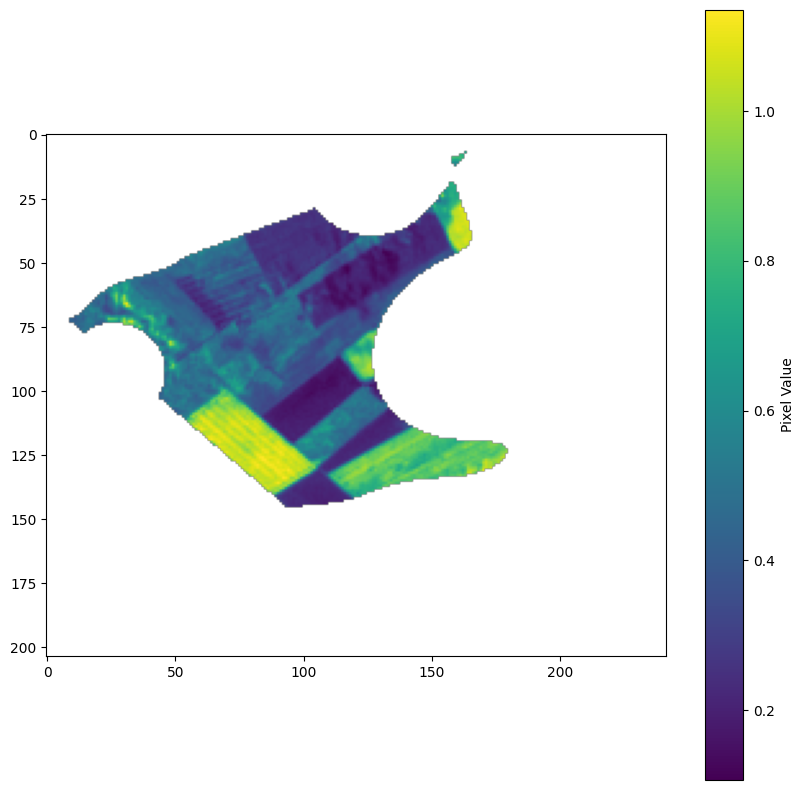

In [28]:
path =  "./workflow.tiff"
datacube.execute_batch(
    path,
    title="CDSE Federation - EVI Workflow"
)
visualise_tif(path)


## Accessing an Experiment

The final example demonstrates how to re-execute an experiment from the OSC. In this instance, accessing the experiment's processing graph is essential as it encompasses the entire processing workflow, including the input parameters of the experiment. This information is provided with every openEO-based experiment published to the OSC.

In [29]:

process_graph_url = "https://raw.githubusercontent.com/ESA-EarthCODE/open-science-catalog-metadata-testing/c4a1e08684b4b7297d887d35305cc95624c54f77/experiments/cdse_federation_-_evi_timeseries_experiment_-_example_-_belgium/process_graph.json"

In [30]:
experiment = connection.datacube_from_json(process_graph_url)
print(datacube.to_json())

{
  "process_graph": {
    "evitimeseries1": {
      "process_id": "evi_timeseries",
      "arguments": {
        "spatial_extent": {
          "type": "FeatureCollection",
          "features": [
            {
              "type": "Feature",
              "properties": {},
              "geometry": {
                "coordinates": [
                  [
                    [
                      5.237940082258575,
                      51.261328505909376
                    ],
                    [
                      5.2592841876327725,
                      51.24912709441142
                    ],
                    [
                      5.271576732017934,
                      51.25238044945303
                    ],
                    [
                      5.263267882571938,
                      51.266697225027485
                    ],
                    [
                      5.237940082258575,
                      51.261328505909376
                    ]
          

0:00:00 Job 'cdse-j-250429150356459494cd7c7ce261e37e': send 'start'
0:00:16 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:00:22 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:00:28 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:00:36 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:00:47 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:00:59 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:01:15 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:01:34 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:01:58 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:02:28 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:03:06 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:03:53 Job 'cdse-j-250429150356459494cd7c7ce261e37e': queued (progress 0%)
0:04:52 Job 'cdse-j-

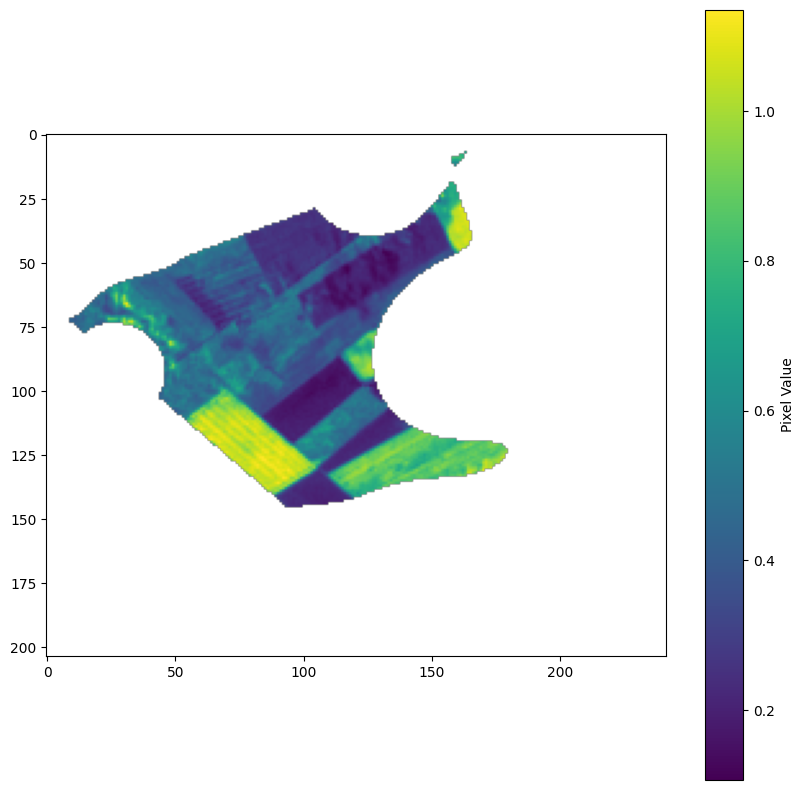

In [31]:
path =  "./experiment.tiff"
experiment.execute_batch(
    path,
    title="CDSE Federation - WorldCereal Experiment"
)
visualise_tif(path)